In [2]:
import pandas as pd
from collections import defaultdict

loaded = defaultdict(list)
squished = []

file_labels = {
    "gladiator-mixed": "mixed grid",
    "gladiator-standard": "standard grid"
}

folder = "./gladiator-runs/"

num_files = 20

print(file_labels)

for i in range(num_files):
    
    for key in file_labels:
        moo = pd.read_csv("{}{}-{}-quorum.csv".format(folder, key, i), skipinitialspace=True)
        moo['replicant'] = "{0}".format(i)
        
        #moo.set_index(["update"])
        loaded[key].append(moo)

for key in file_labels:
    squash = pd.concat(loaded[key], axis=0)
    squash["config"] = file_labels[key]
    #print("Key {} and value{}".format(key, file_labels[key]))
    squished.append(squash)
    
super_squished = pd.concat(squished)
#super_squished = pd.concat([squished_coop, squished_balanced])
super_squished.head()

{'gladiator-mixed': 'mixed grid', 'gladiator-standard': 'standard grid'}


,update,avg_age,max_age,avg_coop,avg_points,percent_defector,percent_donator,replicant,config
0,0,0.0000,0,0.623309,0.0000,0.376691,0.623309,0,mixed grid
1,10,10.0000,10,0.623309,10.0000,0.376691,0.623309,0,mixed grid
2,20,20.0000,20,0.623309,20.0000,0.376691,0.623309,0,mixed grid
3,30,9.2086,30,0.425806,18.4957,0.574194,0.425806,0,mixed grid
4,40,10.6824,40,0.287193,17.2060,0.712807,0.287193,0,mixed grid


Populating the interactive namespace from numpy and matplotlib


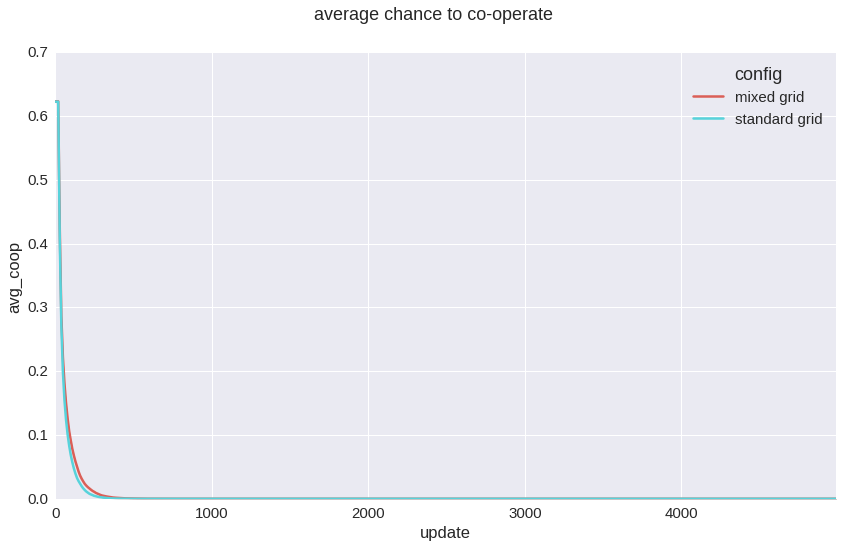

In [16]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

pylab.rcParams['figure.figsize'] = (14, 8)

plt.subplots_adjust(top=0.9)
sns.plt.suptitle("average chance to co-operate")
sns.tsplot( time="update", value="avg_coop", unit="replicant", 
           condition="config", data=super_squished, color="hls")